# Flight Delay Prediction Project 

## APMA 4990 Introduction to Data Science Industry
## By Tian Hang

Flight delay has become widespread in the United States. Nearly one quarter of all flights are delayed by more than 15 minutes. In the United States, the Federdal Aviation Administration has estimated the total cost for flight delay cost 22 billion yearly. Moreover, flight delay can also have indirect effect of lost labor productivity, an opportunity cost of time for travellers, and changes in consumer spending on travel and tourism goods and services.Thus, correctly prediecting flight delays can help airlines to response to potential causes of flight delays and allow travelers to prepare ahead for the further actions.Therefore, this project will build a supervised learning model that predicts airline delay from historical flight data and weather information.


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://damhyul3s75yv.cloudfront.net/photos/11840/original_Is_EU_Compensation_Owed_When_the_US_Connecting_Flight_is_Delayed.jpg")

## Audience:
+ Travelers, Aviation authorities and Airlines, People who are going to pick up the travelers.

## Algorithms:
+  Basic Statistical measurements
+  Logistic Regression
+  Random Forest Classification
+  Visualizing data: Plots

## User Interface:
+  The users can input their choices on the web application. The python code with machine learning algorithms will run to provide an information regarding whether the flight will be delayed depending on (15 minutes threshold)

## Data Resourse:
+  https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236 (Bureau of Transportation)


## Reference:
+  http://news.berkeley.edu/2010/10/18/flight_delays/
+  https://www.bloomberg.com/news/articles/2016-08-23/blame-the-airlines-not-the-weather-for-most-u-s-flight-delays
+  https://developer.ibm.com/clouddataservices/2016/08/04/predict-flight-delays-with-apache-spark-mllib-flightstats-and-weather-data/
+  https://www.crowdanalytix.com/contests/predict-airline-delay-for-domestic-and-international-flights-in-us
+  https://www.rita.dot.gov/bts/help/aviation/html/understanding.html

## Data Cleaning and Featuring

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the data from June 2016 flight data."201606flight.csv" is only for visual purpose.

flightdata = pd.read_csv('../python-introduction-th2669/201606flight.csv')
flightdata.drop(['Unnamed: 19','CARRIER_DELAY','WEATHER_DELAY'],axis=1,inplace=True)
flightdata.dropna(subset = ['UNIQUE_CARRIER','ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','ARR_DELAY','DISTANCE'],inplace=True)
flightdata.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE
0,2016,6,2,4,AA,AA,1,BOS,JFK,600,547.0,-13.0,711,705.0,-6.0,53.0,187.0
1,2016,6,3,5,AA,AA,1,BOS,JFK,600,559.0,-1.0,711,719.0,8.0,45.0,187.0
2,2016,6,4,6,AA,AA,1,BOS,JFK,600,555.0,-5.0,711,700.0,-11.0,41.0,187.0
3,2016,6,6,1,AA,AA,1,BOS,JFK,600,1155.0,355.0,711,1321.0,370.0,44.0,187.0
4,2016,6,7,2,AA,AA,1,BOS,JFK,600,552.0,-8.0,711,730.0,19.0,43.0,187.0


In [2]:
airlines = pd.read_csv('../python-introduction-th2669/airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [3]:
airports= pd.read_csv('../python-introduction-th2669/airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


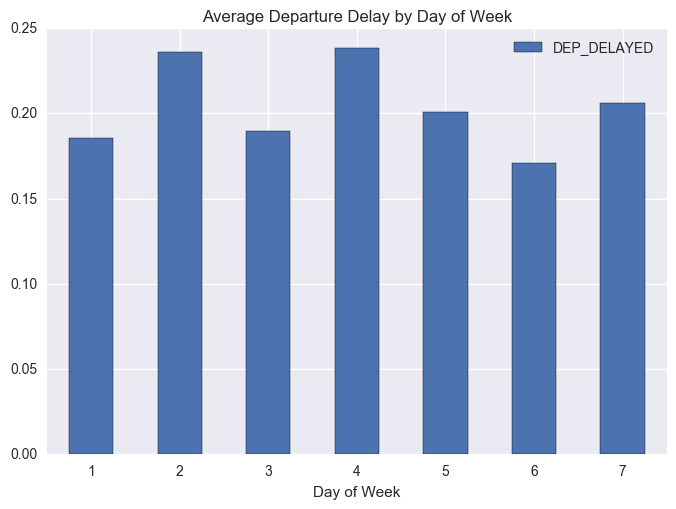

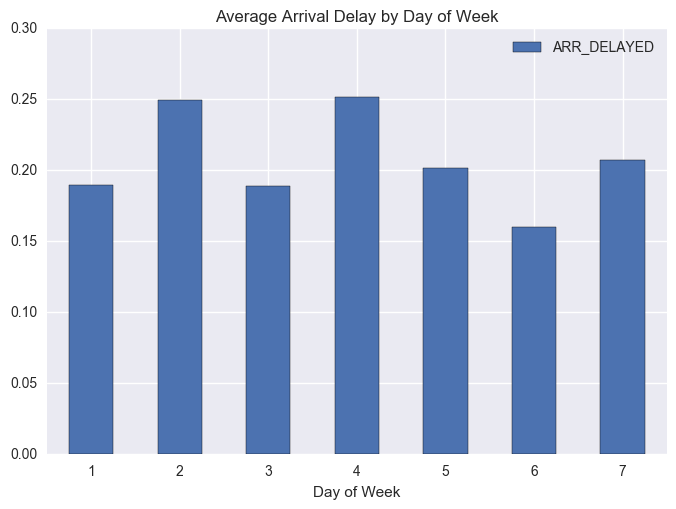

In [4]:
# Plot the average number of delayed flights by day within a week.
# (Weekday vs Weekend)
flightdata['DEP_DELAYED'] = flightdata['DEP_DELAY'].apply(lambda x: x>=15)
flightdata['ARR_DELAYED'] = flightdata['ARR_DELAY'].apply(lambda x: x>=15)

# Compute average number of delayed flights by hour
flightdata[['DAY_OF_WEEK','DEP_DELAYED']].groupby('DAY_OF_WEEK').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.title('Average Departure Delay by Day of Week')
plt.show()

# Compute average number of delayed flights by hour
flightdata[['DAY_OF_WEEK','ARR_DELAYED']].groupby('DAY_OF_WEEK').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.title('Average Arrival Delay by Day of Week')
plt.show()


Thus,we can observe that Tuesdat and Thursday are likely to have delayed flights. 

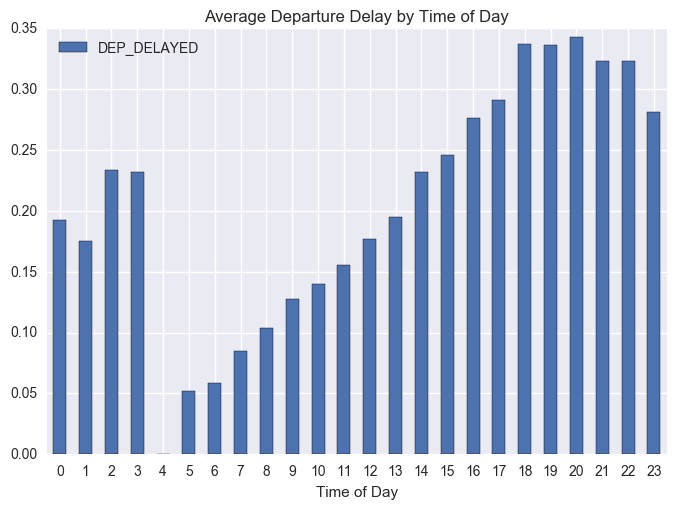

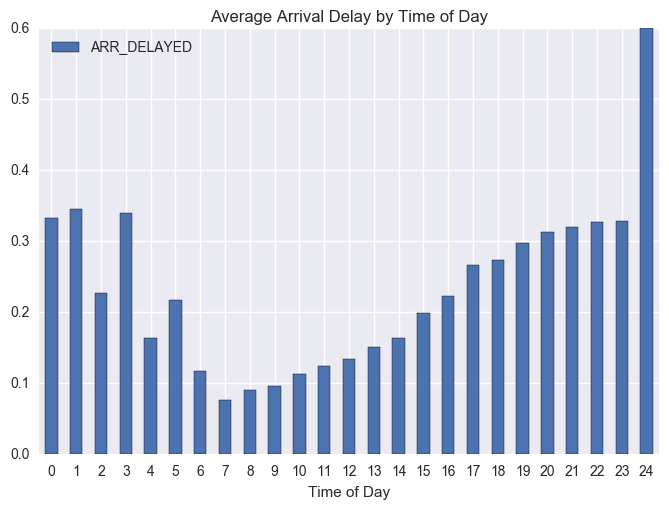

In [5]:
# Plot the average number of delayed flights by hours

flightdata['DEP_HR'] = flightdata['CRS_DEP_TIME'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
flightdata['ARR_HR'] = flightdata['CRS_ARR_TIME'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
# Compute average number of delayed flights by hour
flightdata[['DEP_HR','DEP_DELAYED']].groupby('DEP_HR').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Time of Day')
plt.title('Average Departure Delay by Time of Day')
plt.show()

# Compute average number of delayed flights by hour
flightdata[['ARR_HR','ARR_DELAYED']].groupby('ARR_HR').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Time of Day')
plt.title('Average Arrival Delay by Time of Day')
plt.show()

We can see that the average number of departure delay is the highest from 17 - 19. And arrival delay is the highest in midnight.

In [7]:
flight_sub = pd.merge(flightdata,airlines,how='left',left_on='UNIQUE_CARRIER', right_on='IATA_CODE')
flight_sub.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DEP_DELAYED,ARR_DELAYED,DEP_HR,ARR_HR,IATA_CODE,AIRLINE
0,2016,6,2,4,AA,AA,1,BOS,JFK,600,...,705.0,-6.0,53.0,187.0,False,False,6,7,AA,American Airlines Inc.
1,2016,6,3,5,AA,AA,1,BOS,JFK,600,...,719.0,8.0,45.0,187.0,False,False,6,7,AA,American Airlines Inc.
2,2016,6,4,6,AA,AA,1,BOS,JFK,600,...,700.0,-11.0,41.0,187.0,False,False,6,7,AA,American Airlines Inc.
3,2016,6,6,1,AA,AA,1,BOS,JFK,600,...,1321.0,370.0,44.0,187.0,True,True,6,7,AA,American Airlines Inc.
4,2016,6,7,2,AA,AA,1,BOS,JFK,600,...,730.0,19.0,43.0,187.0,False,True,6,7,AA,American Airlines Inc.


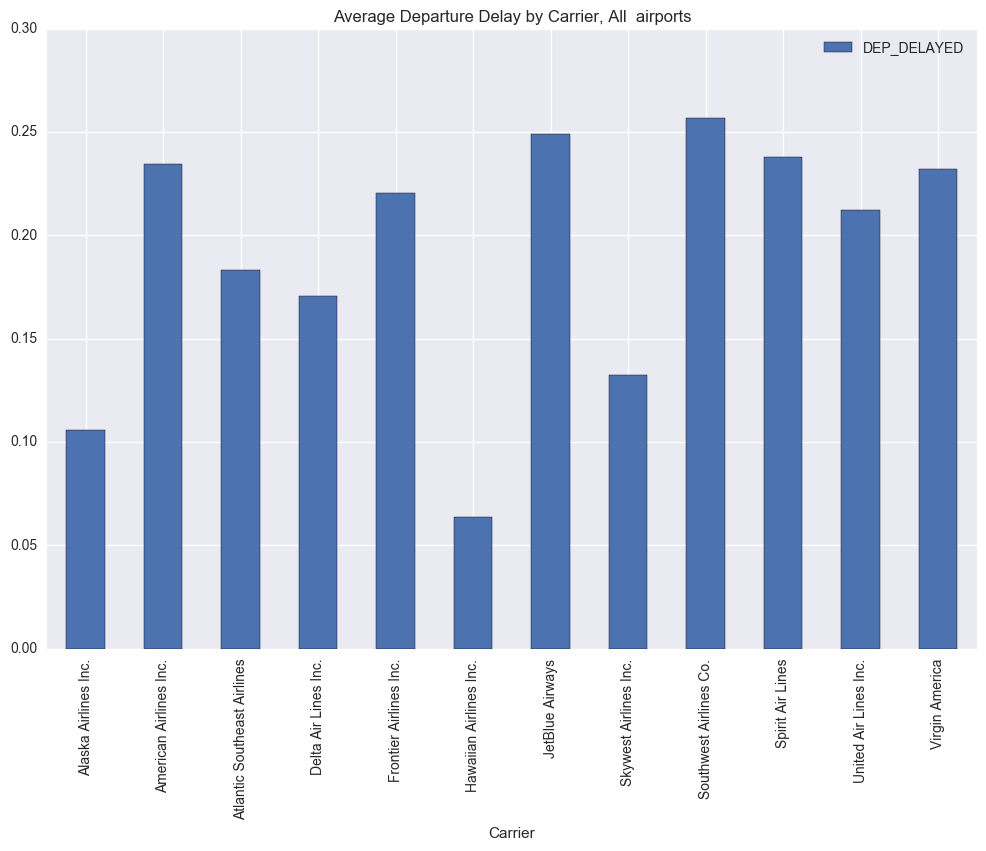

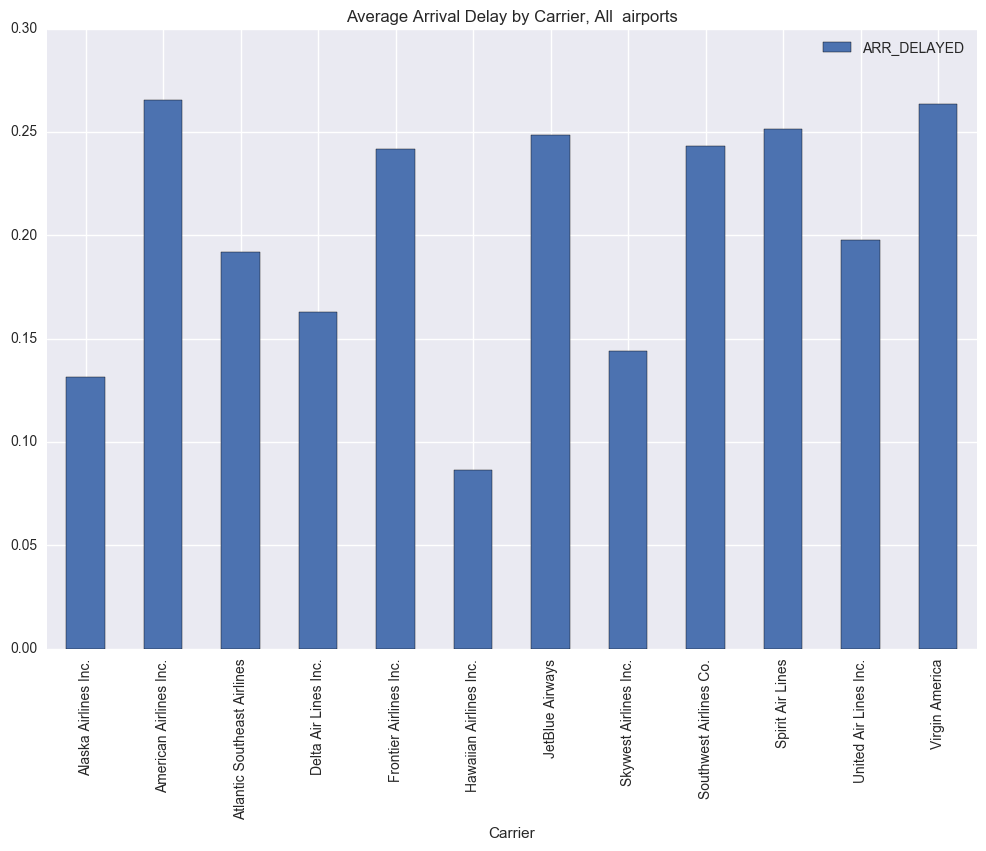

In [8]:
# Plot of average flight delays with carriers.

flight_sub[['AIRLINE','DEP_DELAYED']].groupby('AIRLINE').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=90)
plt.xlabel('Carrier')
plt.title('Average Departure Delay by Carrier, All  airports')
plt.show()

flight_sub[['AIRLINE','ARR_DELAYED']].groupby('AIRLINE').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=90)
plt.xlabel('Carrier')
plt.title('Average Arrival Delay by Carrier, All  airports')
plt.show()


We can observe that the major departure delay occur MOST in Southwest Airline Co. And we can see that the major arrival delay occur MOST in American Airlines.


### Predictive Models Explore

First, we consider that a flight is on-time if the departure and arrival delay is within 15 minutes. The flight is considered to be delayed if the delay time is more than 15 minutes.

In this project, we will mainly focus on the historical dataset from JUNE 2016 to predict the flight delay in JUNE 2017.

There are some features that we have observed that are useful in the prediction:

1. Day of Week.
2. Departure Hour and Arrival Hour.
3. Airports.
4. Carriers.

This is a simple model because we are using the data only from June. We can do the same procedure with other data from the whole year, which we will not get into that in this project. However, we can definitely apply the same method to achieve that.